In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

In [2]:
SAMPLE_RATE = 16000

In [4]:
train = pd.read_csv('C:/Users/денис/Desktop/AIChallenge/data/train_gt.csv', header=None, names=['audio', 'label'])
test = pd.read_csv('C:/Users/денис/Desktop/AIChallenge/data/test.csv', header=None, names=['audio', 'label'])
train

,audio,label
0,611b27e7-0019-4fc6-9622-21d9647c45f0.mp3,1
1,67465147-b88c-4acd-bb91-a78340a9bde7.mp3,0
2,257002c3-13ce-4408-853a-a5686a051d1c.mp3,0
3,16c70c64-e167-40e5-a4be-cf861e84c497.mp3,0
4,6ed94dcd-d1e5-4d98-b6ee-d86766d7bf50.mp3,1
...,...,...
8798,4aa877af-9732-48ce-9f62-039ef9efcd71.mp3,0
8799,f0f0fe3d-a310-4493-90a5-29ec74f36190.mp3,1
8800,00ba7f5c-b440-4793-8771-e475e1eca510.mp3,0
8801,c0033769-6686-4bc8-9197-a13563dbd8a5.mp3,1


In [7]:
audio = []
labels = train['label'].tolist()
for audio_path in train['audio'].tolist(): 
    y, sr = librosa.load(f'C:/Users/денис/Desktop/AIChallenge/new-data/train/{audio_path}', sr=SAMPLE_RATE)  
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    spectrogram = spectrogram.T
    audio.append(spectrogram)

In [8]:
audio_pred = []
for audio_path in test['audio'].tolist(): 
    y, sr = librosa.load(f'C:/Users/денис/Desktop/AIChallenge/new-data/test/{audio_path}', sr=SAMPLE_RATE)  
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    spectrogram = spectrogram.T
    audio_pred.append(spectrogram)

In [9]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
 
X_train, X_test, y_train, y_test = train_test_split(audio, encoded_labels, test_size=0.2, random_state=42)


if max([spec.shape[0] for spec in audio]) >= max([spec.shape[0] for spec in audio_pred]):
    max_length = max([spec.shape[0] for spec in audio])
else:
    max_length = max([spec.shape[0] for spec in audio_pred])

X_train = [np.pad(spec, ((0, max_length - spec.shape[0]), (0, 0)), mode='constant') for spec in X_train]
X_test = [np.pad(spec, ((0, max_length - spec.shape[0]), (0, 0)), mode='constant') for spec in X_test]
test_pred = [np.pad(spec, ((0, max_length - spec.shape[0]), (0, 0)), mode='constant') for spec in audio_pred]

test_pred = np.array(test_pred)
X_train = np.array(X_train)
X_test = np.array(X_test)

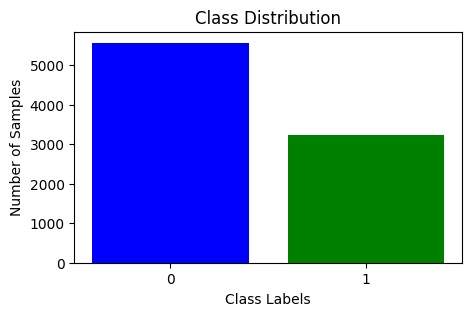

In [10]:
a = 0
b = 0
for _ in labels:
    if _==1:
        a+=1
    else: 
        b+=1
class_counts = [b, a]
class_names = ['0', '1']
class_colors = ['blue', 'green']
plt.figure(figsize=(5, 3))
plt.bar(class_names, class_counts, color=class_colors)
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

Мб есть смысл распределить по ровну данные по обучению

In [11]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [12]:
dataset = test_pred.reshape(test_pred.shape[0], -1)

In [13]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_flat, y_train)

GradientBoostingClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test_flat)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.6f}.')
print(f'F1_score: {f1:.6f}.')

Accuracy: 0.637138.
F1_score: 0.204234.


In [16]:
pred = model.predict(dataset)

In [17]:
final = pd.DataFrame({
    'names': test['audio'].tolist(),
    'labels': pred
})

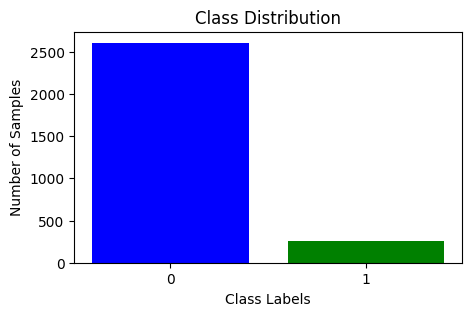

In [19]:
a = 0
b = 0
for _ in final['labels'].tolist():
    if _==1:
        a+=1
    else: 
        b+=1
class_counts = [b, a]
class_names = ['0', '1']
class_colors = ['blue', 'green']
plt.figure(figsize=(5, 3))
plt.bar(class_names, class_counts, color=class_colors)
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

In [20]:
final.to_csv('final_file.csv', header=False, index=False)